In [2]:
import numpy as np
import pandas as pd
import time
import requests
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metricFs import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials as YF
from pandas_datareader import data
#import edgar
import requests
from tqdm import tqdm
import pandas as pd
from bs4 import BeautifulSoup
import statsmodels.api as sm
from operator import itemgetter 
from scipy import stats
import urllib
import zipfile
from heapq import nsmallest 
import datetime
#from sec_edgar_downloader import Downloader
import pickle 
import quandl

In [6]:
symbol = 'SPY'
bars = quandl.get("WIKI/AAPL", collapse="daily")

In [7]:
bars

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [5]:
tick  = YF(["MSFT", "AAPL"])

print(tick.get_summary_data())
print(tick.get_stock_quote_type_data())
print(tick.get_stock_price_data())
print(tick.get_current_price())
print(tick.get_dividend_rate())

{'MSFT': {'previousClose': 224.97, 'regularMarketOpen': 227.08, 'twoHundredDayAverage': 213.22949, 'trailingAnnualDividendYield': 0.009290127, 'payoutRatio': 0.32900003, 'volume24Hr': None, 'regularMarketDayHigh': 230.07, 'navPrice': None, 'averageDailyVolume10Day': 31726666, 'totalAssets': None, 'regularMarketPreviousClose': 224.97, 'fiftyDayAverage': 218.34032, 'trailingAnnualDividendRate': 2.09, 'open': 227.08, 'toCurrency': None, 'averageVolume10days': 31726666, 'expireDate': '-', 'yield': None, 'algorithm': None, 'dividendRate': 2.24, 'exDividendDate': '2021-02-17', 'beta': 0.826155, 'circulatingSupply': None, 'startDate': '-', 'regularMarketDayLow': 225.8, 'priceHint': 2, 'currency': 'USD', 'trailingPE': 36.44943, 'regularMarketVolume': 30172663, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 1708295061504, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 28949040, 'priceToSalesTrailing12Months': 11.612049, 'dayLow': 225.8, 'ask': 226.

In [7]:
# 
def getMarketData(ticker):
    req = YF(ticker).get_summary_data()[ticker]
    return(req)
getMarketData("AAPL")['marketCap']

2215357710336

In [3]:
tick.get_key_statistics_data()["AAPL"]["sharesOutstanding"]

16823300096

In [3]:
# gets tickers for sp 500
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])


In [4]:
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
def convert_time(epoch):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epoch))
    
epoch_time = int(time.time())
day_epoch = 60*60*24
tickers = df['Symbol'][:50]
days_back = 100
    stocks = {}
    for tick in tqdm(tickers):
        try:
            stock_data = data.DataReader(tick, 
                            start=convert_time(epoch_time - (int(days_back)* day_epoch)), 
                            end=convert_time(epoch_time), 
                            data_source='yahoo')
            stocks[tick] = stock_data 
        except:
            print("Skipping stock for {}, bad data :<".format(tick))

 42%|██████████████████████████████████▍                                               | 21/50 [00:09<00:12,  2.27it/s]

Skipping stock for LNT, bad data :<


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:27<00:00,  1.83it/s]


In [81]:
stocks["ABT"].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,111.040001,107.820000,109.900002,108.040001,4228500.0,107.606491
2020-10-20,109.889999,108.110001,108.349998,108.360001,3873500.0,107.925209
2020-10-21,109.000000,104.750000,108.010002,105.930000,5716000.0,105.504959
2020-10-22,110.050003,106.239998,106.419998,109.480003,4953800.0,109.040718
2020-10-23,110.000000,107.570000,109.639999,107.790001,3573000.0,107.357498


In [67]:
# SAVE
with open("stocks.pkl", "wb") as pkl_handle:
    pickle.dump(stocks, pkl_handle)

In [2]:
# LOAD
with open("stocks.pkl", "rb") as pkl_handle:
    stocks = pickle.load(pkl_handle)

In [3]:
def addMACD(stocks):
    for stock in list(stocks): 
        exp1 = stocks[stock]['Adj Close'].ewm(span=12, adjust=False).mean()
        exp2 = stocks[stock]['Adj Close'].ewm(span=26, adjust=False).mean()
        stocks[stock]['macd'] = exp1-exp2
        stocks[stock]['macd_signal'] = stocks[stock]['macd'].ewm(span=9, adjust=False).mean()
    return(stocks)

def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

def addRSI(stocks, time_window):
    for stock in list(stocks):
        stocks[stock]["RSI"] = computeRSI(stocks[stock]["Adj Close"], time_window)
    return(stocks)

def addBB(stocks, time_window):
    for stock in list(stocks):      
        stocks[stock]['MA20'] = stocks[stock]['Adj Close'].rolling(window=time_window).mean()
        stocks[stock]['20dSTD'] = stocks[stock]['Adj Close'].rolling(window=time_window).std() 
        stocks[stock]['UpperBB'] = stocks[stock]['MA20'] + (stocks[stock]['20dSTD'] * 2)
        stocks[stock]['LowerBB'] = stocks[stock]['MA20'] - (stocks[stock]['20dSTD'] * 2)
        stocks[stock]['LowerBB_dist'] = stocks[stock]['LowerBB'] - stocks[stock]['MA20']
        stocks[stock]['UpperBB_dist'] = stocks[stock]['MA20'] - stocks[stock]['UpperBB']
    return(stocks)

def addReturns(stocks):
    for stock in list(stocks):
        stocks[stock]['simple_returns'] = stocks[stock]['Adj Close'].pct_change()
        stocks[stock]['log_returns'] = np.log(stocks[stock]['simple_returns']+1)
        stocks[stock]['cum_daily_return'] = ((1 + stocks[stock]['simple_returns']).cumprod() - 1)
    return(stocks)

def addVol(stocks, periods):
    for stock in list(stocks):
        stocks[stock]['volatility'] = stocks[stock]['simple_returns'].rolling(periods).std() * np.sqrt(periods)
    return stocks

def lagFeatures(stocks, features, periods, returns):
    # sets the columns we want in our final df
    cols_wanted = features +returns
    stocks_lagged = stocks.copy()
    print(f'The columns wanted are {cols_wanted}')
    for stock in list(stocks):
        stocks_lagged[stock][features] = stocks_lagged[stock][features].shift(periods)
        stocks_lagged[stock] = pd.DataFrame(stocks_lagged[stock], columns=cols_wanted)
    return(stocks_lagged)




stocks = addBB(stocks,20)        
stocks= addMACD(stocks)
stocks = addRSI(stocks,14)
stocks = addReturns(stocks)
stocks = addVol(stocks,50)
stocks.keys()
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'MA20', '20dSTD', 'UpperBB', 'LowerBB', 'macd', 'macd_signal', 'RSI']
stocks_lagged = lagFeatures(stocks,features,1, ['log_returns', 'simple_returns'])

The columns wanted are ['High', 'Low', 'Open', 'Close', 'Volume', 'MA20', '20dSTD', 'UpperBB', 'LowerBB', 'macd', 'macd_signal', 'RSI', 'log_returns', 'simple_returns']


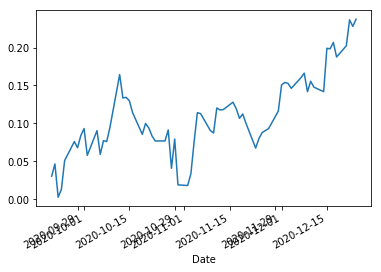

In [4]:
stocks['AAPL']['cum_daily_return'].dropna().plot()

In [10]:
stocks_lagged['AAPL'].tail()

,High,Low,Open,Close,Volume,MA20,20dSTD,UpperBB,LowerBB,macd,macd_signal,RSI,log_returns,simple_returns
Date,,,,,,,,,,,,,,
2020-12-18,129.580002,128.039993,128.899994,128.699997,94359800.0,121.469499,4.232955,129.935410,113.003589,2.634637,2.048415,67.588437,-0.015978,-0.015851
2020-12-21,129.100006,126.120003,128.960007,126.660004,192541500.0,121.870499,4.329577,130.529654,113.211345,2.634323,2.165597,61.509330,0.012319,0.012395
2020-12-22,128.309998,123.449997,125.019997,128.229996,121251600.0,122.414999,4.413780,131.242560,113.587439,2.729297,2.278337,64.179577,0.028067,0.028465
2020-12-23,134.410004,129.649994,131.610001,131.880005,168904800.0,123.316500,4.413619,132.143739,114.489261,3.063772,2.435424,69.480533,-0.007000,-0.006976
2020-12-24,132.429993,130.779999,132.160004,130.960007,88223700.0,124.106000,4.290210,132.686421,115.525579,3.217521,2.591843,66.797290,0.007683,0.007712


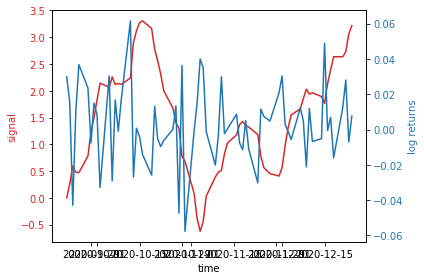

In [11]:
df = stocks['AAPL']
# plt.plot(df['macd_signal'])
# plt.plot(df['log_returns'])
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('signal', color=color)
ax1.plot(df['macd'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('log returns', color=color)  # we already handled the x-label with ax1
ax2.plot(df['log_returns'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<AxesSubplot:>

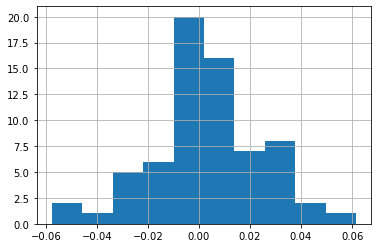

In [19]:
df['log_returns'].hist()
#The distribution looks very symmetrical and 
# normally distributed: the daily changes center around the bin 0.00. Note, 
# though, how you can and should use the results of the describe() function, applied on 
# daily_pct_c, to correctly interpret the results of the histogram. You will see that the mean 
# is very close to the 0.00 bin

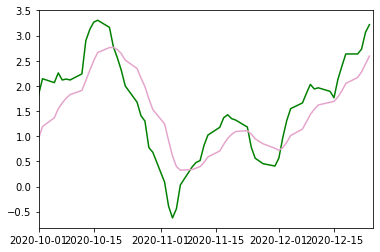

In [20]:
df=stocks["AAPL"]
plt.plot( df['macd'], label='AMD MACD', color = 'green')
plt.plot(df['macd_signal'], label='Signal Line', color='#E5A4CB')
plt.xlim([datetime.date(2020, 10, 1), datetime.date(2020, 12, 25)])
plt.show()

In [9]:
import matplotlib.pyplot as plt
plt.plot( df['MA20'], label='MA20', color = '#EBD2BE')
plt.plot(df['UpperBB'], label='UpperBB', color='#E5DFDB')
plt.plot(df['LowerBB'], label='LowerBB', color='#E00000')
plt.legend(loc='upper left')
plt.show()

KeyError: 'MA20'

In [24]:
# def add10QSentiment(stocks, current_date, start_date):
#     for stock in tickers: 
#         print(stock)
#         dl.get("10-Q", stock, after_date=start_date.strftime("%Y%M%d"), before_date=current_date.strftime("%Y%M%d"))
# add10QSentiment(stocks,current_date,start_date)

In [25]:
# import os
# dir = "./edgars/sec_edgar_filings/AAPL/10-Q/"
# directory = os.fsencode("./edgars/sec_edgar_filings/AAPL/10-Q/")
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
#     if(filename.endswith(".txt") or filename.endswith(".py")):
#         #print(filename)
#         #year = filename[]
#         path = os.path.join(dir, filename)
#         #print(path)
#         text = open(path,'r').read()
#         #print(text[:100])

In [26]:
# # Daily returns
# daily_close = daily_pct_change = df[['Adj Close']]
# daily_pct_change = df[['Adj Close']].pct_change()

# # Replace NA values with 0
# daily_pct_change.fillna(0, inplace=True)

# # Inspect daily returns
# print(daily_pct_change)

# # Daily log returns
# daily_log_returns = np.log(daily_close.pct_change()+1)

# # Print daily log returns
# print(daily_log_returns)

In [48]:
list(stocks.keys())[0]

'MMM'

In [5]:
def dict_2_panel(stocks_lagged):  
    df = pd.DataFrame()
    for stock in list(stocks):
        stocks_lagged[stock]['ticker'] = stock
        df = df.append(stocks_lagged[stock])
    return df
df = dict_2_panel(stocks_lagged)

def getPortReturns(stocks):
    df = pd.DataFrame()
    #df.index = stocks[list(stocks.keys())[0]].index
    for stock in list(stocks):
        df[stock] = stocks[stock]['simple_returns']
    return df.dropna()
port_returns = getPortReturns(stocks)

In [6]:
port_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-21,-0.048304,-0.008516,-0.011320,0.002980,-0.009611,0.016482,0.017303,0.040171,-0.035417,-0.022885,...,0.013472,-0.024528,-0.008955,-0.025545,-0.042688,0.030326,0.020837,-0.049354,-0.023720,-0.029257
2020-09-22,0.006073,-0.010854,-0.005500,0.011773,0.012868,0.015232,0.023421,-0.003079,0.011318,-0.006536,...,0.020214,-0.039851,0.003865,0.015035,0.010735,0.015716,0.009944,-0.000591,0.010535,0.024756
2020-09-23,-0.017433,-0.019752,-0.016479,-0.033012,-0.026465,-0.030490,-0.033670,-0.038224,-0.024382,-0.026316,...,-0.040864,-0.006911,0.002200,-0.016331,-0.093137,-0.041946,-0.011055,-0.006626,-0.039149,-0.007253
2020-09-24,0.005705,-0.017619,-0.014115,0.009073,-0.070366,-0.005491,-0.005782,0.014586,0.001775,0.011261,...,0.006148,0.012412,-0.023602,0.023166,-0.018018,0.010269,0.009432,0.004527,0.006865,-0.000101
2020-09-25,-0.000935,0.025069,0.003725,0.015126,0.000979,0.016188,0.025894,0.029544,0.018404,0.001670,...,0.025459,0.026007,0.003475,-0.015849,-0.096330,0.037516,0.007614,0.024546,0.013415,0.010985


In [7]:
cov_mat = port_returns.cov()
cov_mat_annual = cov_mat * 252
cov_mat_annual

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET
MMM,0.050142,0.015442,0.018574,0.006632,0.021496,-0.009287,-0.009457,-0.017107,0.020582,0.028783,...,-0.001623,0.009146,0.017540,0.037267,0.086686,-0.003540,0.009598,0.043963,0.032491,0.026408
ABT,0.015442,0.056152,0.022069,0.031239,0.023068,0.027438,0.030002,0.035762,0.007146,0.004645,...,0.034585,0.028003,0.015680,0.015536,-0.015442,0.038228,0.017602,0.020658,0.014316,0.033315
ABBV,0.018574,0.022069,0.076261,0.012741,0.023317,0.011623,0.016772,0.005313,0.010568,0.000862,...,0.019401,0.058204,0.019578,0.007999,0.099397,0.004392,0.025304,0.012265,0.001956,0.020758
ABMD,0.006632,0.031239,0.012741,0.133662,0.022925,0.028730,0.029524,0.034640,0.009630,0.026326,...,0.041579,0.044310,0.023500,-0.007322,0.019885,0.027589,0.009249,0.002442,0.015057,0.036012
ACN,0.021496,0.023068,0.023317,0.022925,0.087601,0.021386,0.039714,0.021271,0.026174,0.022996,...,0.038656,0.022539,0.032503,0.020176,0.080372,0.032950,0.039134,0.043630,0.025166,0.043600
ATVI,-0.009287,0.027438,0.011623,0.028730,0.021386,0.076486,0.067715,0.057849,0.007857,-0.007297,...,0.057098,0.017384,0.007086,0.000708,-0.036043,0.057301,0.028767,-0.000153,0.007680,0.012322
ADBE,-0.009457,0.030002,0.016772,0.029524,0.039714,0.067715,0.106420,0.082693,0.014103,-0.000604,...,0.082544,0.035120,0.012776,0.008732,-0.033768,0.072599,0.056686,0.014656,0.003446,0.047697
AMD,-0.017107,0.035762,0.005313,0.034640,0.021271,0.057849,0.082693,0.167965,0.001082,-0.003699,...,0.079366,0.028333,0.009087,0.009503,-0.016355,0.078538,0.066574,0.020582,0.004256,0.034151
AAP,0.020582,0.007146,0.010568,0.009630,0.026174,0.007857,0.014103,0.001082,0.056812,0.023815,...,0.027176,0.022961,0.016619,0.019236,0.051425,0.015471,0.019871,0.039889,0.024825,0.041672
AES,0.028783,0.004645,0.000862,0.026326,0.022996,-0.007297,-0.000604,-0.003699,0.023815,0.084509,...,0.006842,0.021461,0.010882,0.030448,0.098901,0.018833,0.024954,0.044540,0.042475,0.024161


In [8]:
# random portfolio weights generator
def getRandomWeights(numstocks):
    weights = np.random.rand(numstocks)
    return (weights/np.sum(weights))
def getPortWeightedReturns(port_ret, weights):
    assert(len(port_ret.columns) == len(weights))
    return port_ret.iloc[:,0:numstocks].mul(weights, axis=1).sum(axis=1)
#getRandomWeights(50)
def getPortWeightedVol(port_ret, weights):
    cov_mat = port_ret.cov()
    #cov_mat_annual = cov_mat * 252
    #cov_mat_annual
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))
    return port_vol
def getPortWeightedAnnualReturn(port_ret, weights):
    returns = getPortWeightedReturns(port_ret,weights)
    
    mean_return_daily = np.mean(returns)
    # Calculate the implied annualized average return
    mean_return_annualized = ((1+mean_return_daily)**252)-1
    return(mean_return_annualized)
    
    
getPortWeightedReturns(port_returns, getRandomWeights(50))
# print(getPortWeightedVol(port_returns, getRandomWeights(50)))
# getPortWeightedAnnualReturn(port_returns,getRandomWeights(50))

NameError: name 'port_returns' is not defined

In [32]:
port_returns.describe()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.000650,0.000363,0.002351,0.002256,0.001490,0.002024,0.001191,0.003320,0.000770,0.003423,...,0.002804,0.002618,0.000846,0.000845,0.003284,0.003378,0.006429,0.005642,0.000812,0.005639
std,0.014106,0.014927,0.017396,0.023031,0.018645,0.017422,0.020550,0.025817,0.015015,0.018313,...,0.019968,0.024280,0.015768,0.018285,0.051935,0.022166,0.020885,0.021533,0.017969,0.024950
min,-0.048304,-0.043961,-0.026841,-0.100318,-0.070366,-0.052975,-0.047490,-0.061718,-0.035417,-0.041298,...,-0.043890,-0.043877,-0.040575,-0.031660,-0.096330,-0.056018,-0.040231,-0.049354,-0.073718,-0.034553
25%,-0.006128,-0.008186,-0.008622,-0.007440,-0.007550,-0.008676,-0.010407,-0.012305,-0.008376,-0.006791,...,-0.009782,-0.012642,-0.008374,-0.014080,-0.035531,-0.007123,-0.007517,-0.006916,-0.010521,-0.006858
50%,0.002415,0.001397,-0.001546,0.006581,0.002209,0.004315,0.003442,0.000400,0.001654,0.003205,...,0.004514,0.002366,0.000385,0.001822,-0.003584,0.001838,0.004191,0.002367,0.002730,0.002195
75%,0.009268,0.010471,0.010152,0.015894,0.012792,0.015025,0.015125,0.020580,0.008774,0.011727,...,0.018220,0.014410,0.010650,0.012884,0.039073,0.015145,0.020224,0.020129,0.011102,0.017060
max,0.034939,0.034604,0.074352,0.040427,0.068782,0.040782,0.073147,0.062737,0.039966,0.051655,...,0.044017,0.117222,0.037168,0.049371,0.141686,0.063521,0.078477,0.055718,0.050173,0.154405


In [30]:
np.mean(getPortWeightedReturns(port_returns, getRandomWeights(50)))

0.002181438809590814

In [31]:
# portfolio standard deviation or volatility
port_vol = np.sqrt(np.dot(portfolio_weights_ew.T, np.dot(cov_mat, portfolio_weights_ew)))
port_vol

0.01157210029389322

In [9]:
# equal weighted portfolios
numstocks = len(stocks.keys())
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
print(portfolio_weights_ew)
port_returns.iloc[:,0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]


Date
2020-09-21   -0.017815
2020-09-22    0.007994
2020-09-23   -0.027549
2020-09-24    0.001654
2020-09-25    0.013056
                ...   
2020-12-18   -0.001363
2020-12-21   -0.006580
2020-12-22   -0.002469
2020-12-23    0.003035
2020-12-24    0.003340
Length: 68, dtype: float64

In [10]:
# market-cap weights in python
market_capitalizations = [getMarketCap(x) for x in list(stocks.keys())]
market_capitalizations

NameError: name 'getMarketCap' is not defined

caps = np.array(market_capitalizations)
mcap_weights = caps/sum(caps)
mcap_weights
port_returns.iloc[:,0:numstocks].mul(mcap_weights, axis=1).sum(axis=1)

In [85]:
# Markowitz portfolios
# MSR: Max Sharpe Ratio and GMV Gloval Minimum Volatility Portfolios
risk_free= 0
markov_n = 100
df = pd.DataFrame(columns=["id","return","volatility"])
for x in range(0,markov_n):
    weights = getRandomWeights(50)
    volatility = getPortWeightedVol(port_returns, weights)
    ann_ret = getPortWeightedAnnualReturn(port_returns,weights)
    row = {
        "id":x,
        "return":ann_ret,
        "volatility":volatility,
        "weights":weights
    }
    df = df.append(row,ignore_index=True)
df["sharpe"] = (df["return"] - risk_free) / df["volatility"]
MSR = df.sort_values(by=["sharpe"], ascending=False)
MSR_weights = MSR.iloc[0,0:numstocks]['weights']

GMV = df.sort_values(by=["volatility"],ascending=True)
GMV_weights = GMV.iloc[0,0:numstocks]
#print(MSR_weights)
#print(MSR.iloc[0,0:numstocks])
#getPortWeightedAnnualReturn(port_returns,MSR_weights)
print(GMV_weights)

id                                                           83
return                                                 0.684228
volatility                                            0.0107126
weights       [0.030417514974287373, 0.007954863112597507, 0...
sharpe                                                  63.8715
Name: 83, dtype: object


(0.01, 0.014)

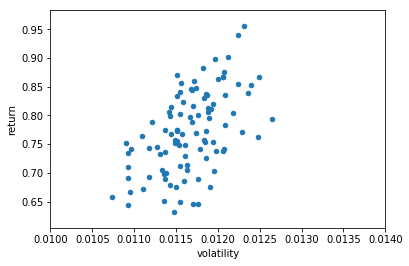

In [76]:
# plt.plot(x=df["volatility"],y=df["return"])

# plt.show()
df.plot.scatter(x="volatility",y="return").set_xlim(0.010, 0.014)

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'MA20'}>,
        <AxesSubplot:title={'center':'20dSTD'}>,
        <AxesSubplot:title={'center':'UpperBB'}>],
       [<AxesSubplot:title={'center':'LowerBB'}>,
        <AxesSubplot:title={'center':'macd'}>,
        <AxesSubplot:title={'center':'macd_signal'}>,
        <AxesSubplot:title={'center':'RSI'}>],
       [<AxesSubplot:title={'center':'log_returns'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

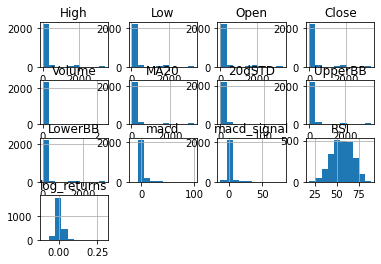

In [29]:
df.hist()

In [30]:
# this cell might need to be run twice
X = pd.DataFrame(df[features])
y = pd.DataFrame(df['log_returns'])
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
# print(est2.summary())
p_values = est2.summary2().tables[1]['P>|t|']
coef = est2.summary2().tables[1]['Coef.']

In [32]:
p_dict = {}
coef_dict = {}
for i in range(0,len(features), 1):
    p_dict[features[i]] = p_values[i]
    coef_dict[features[i]] = coef[i]
p_dict

{'High': 0.018579448075572744,
 'Low': 0.006457315299406476,
 'Open': 0.6091263422686307,
 'Close': 0.018126536183546774,
 'Volume': 0.32726210535209044,
 'MA20': 0.8406848734106438,
 '20dSTD': 0.934689761719318,
 'UpperBB': 0.38613573840784765,
 'LowerBB': 0.6915627797917968,
 'macd': 0.5803652211059149,
 'macd_signal': 0.325497061057786,
 'RSI': 0.3326543022134224}

In [33]:
sig_level = 0.05
p_sig = {k:v for k,v in p_dict.items() if v < sig_level}

In [34]:
# order to sort
p_sort = nsmallest(len(p_dict), p_sig, key = p_dict.get) 

In [35]:
p_sort

['Low', 'Close', 'High']

In [36]:
# get most recent value for each stock
def getLastValue(stock_df, factor):
    return(stock_df.tail(n=1)[factor].values[0])

test = getLastValue(stocks['AAPL'], 'RSI')
test

66.79729003839543

In [37]:
def getStockValues(features):
    sorted_stocks = {}
    for factor in features:
        result = {}
        for stock in list(stocks):
            result[stock] = getLastValue(stocks[stock], factor)
        sorted_stocks[factor] = result  
    return sorted_stocks
sorted_stocks = getStockValues(features)
sorted_stocks

{'High': {'MMM': 175.80999755859375,
  'ABT': 109.68000030517578,
  'ABBV': 103.93000030517578,
  'ABMD': 309.1300048828125,
  'ACN': 261.9200134277344,
  'ATVI': 90.48999786376953,
  'ADBE': 505.4599914550781,
  'AMD': 93.12999725341797,
  'AAP': 160.4600067138672,
  'AES': 23.559999465942383,
  'AFL': 43.900001525878906,
  'A': 118.88999938964844,
  'APD': 268.9800109863281,
  'AKAM': 108.20999908447266,
  'ALK': 52.720001220703125,
  'ALB': 152.82000732421875,
  'ARE': 178.07000732421875,
  'ALXN': 154.22999572753906,
  'ALGN': 543.6500244140625,
  'ALLE': 113.44000244140625,
  'LNT': 50.68000030517578,
  'ALL': 107.55000305175781,
  'GOOGL': 1744.1099853515625,
  'GOOG': 1747.989990234375,
  'MO': 43.06999969482422,
  'AMZN': 3210.1298828125,
  'AMCR': 11.65999984741211,
  'AEE': 77.16999816894531,
  'AAL': 16.170000076293945,
  'AEP': 82.2699966430664,
  'AXP': 118.19000244140625,
  'AIG': 38.040000915527344,
  'AMT': 223.60000610351562,
  'AWK': 150.66000366210938,
  'AMP': 189.6

In [38]:
top_p = 0.4
sort_n = 4
remove_list = ['Open', 'Volume']

def buyDecision(sorted_stocks, top_p, sort_n, p_sort, remove_list, tickers):
    final = tickers
    p_sort = [i for i in p_sort if i not in remove_list]
    print("Initial length to sort:")
    print(len(final))
    for factor in p_sort[:sort_n]:
        print("For factor {}".format(factor))
        # based on wheter coefficient is pos or neg, then get largest value, or smallest value respectively
#         dict_filter = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
#         new_dict_keys = (final)
#         buy_order=dict_filter(buy_order, new_dict_keys)
        res = dict(sorted(sorted_stocks[factor].items(), key = itemgetter(1), reverse = (coef_dict[factor] > 0))[:round(len(final)*top_p)]) 
        keep = list(res.keys())
        final = keep
        print("Reduced to length: {}".format(len(final)))
        print("New list: {}".format(final))
        if (len(final) < 5):
            break
    return(final)
    
stocks_to_buy = buyDecision(sorted_stocks, top_p, sort_n, p_sort, remove_list, tickers)

Initial length to sort:
50
For factor Low
Reduced to length: 20
New list: ['AMZN', 'GOOG', 'GOOGL', 'ALGN', 'ADBE', 'ANSS', 'ANTM', 'ABMD', 'ANET', 'APD', 'ACN', 'AMGN', 'AMT', 'AON', 'AMP', 'MMM', 'ARE', 'AAP', 'ALXN', 'AWK']
For factor Close
Reduced to length: 8
New list: ['AMCR', 'APA', 'AAL', 'AES', 'AIG', 'MO', 'AFL', 'ADM']
For factor High
Reduced to length: 3
New list: ['AMZN', 'GOOG', 'GOOGL']


In [39]:
stock_weight = 1/len(stocks_to_buy)
weights = [stock_weight if x in stocks_to_buy else 0 for x in tickers]
weights

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.3333333333333333,
 0.3333333333333333,
 0,
 0.3333333333333333,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [40]:
price_data  = data.DataReader(tickers, 
                    start=convert_time(epoch_time - (days_back * day_epoch)), 
                    end=convert_time(epoch_time), 
                    data_source='yahoo')

In [41]:
close_price = price_data['Adj Close']

ret_data = close_price.pct_change()[1:]
weighted_returns = (weights * ret_data)

# we can sum since we used log returns
port_ret = weighted_returns.sum(axis=1)
port_ret

Date
2020-09-21   -0.010767
2020-09-22    0.033881
2020-09-23   -0.036701
2020-09-24    0.008481
2020-09-25    0.016002
                ...   
2020-12-18   -0.009504
2020-12-21    0.003692
2020-12-22   -0.005762
2020-12-23    0.001061
2020-12-24    0.001072
Length: 68, dtype: float64

In [42]:
from zipline.api import order, record, symbol



ModuleNotFoundError: No module named 'zipline'

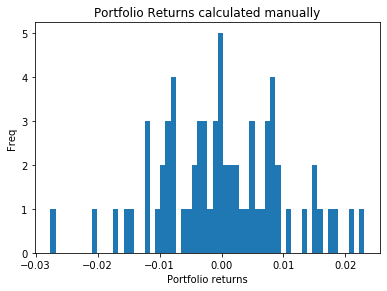

In [134]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 

In [138]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print(mean_ret)
print(std_returns)

9.287336355417456e-05
0.009971191711472708


In [140]:
port_mon = port_ret.resample('M').agg(lambda x: (x + 1).prod() - 1)
port_mon

Date
2020-09-30    0.018124
2020-10-31   -0.007020
2020-11-30    0.026189
2020-12-31   -0.033221
Freq: M, dtype: float64

In [141]:
def get_fama_french():
    # Web url
    ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"
    
    # Download the file and save it
    # We will name it fama_french.zip file
    
    urllib.request.urlretrieve(ff_url,'fama_french.zip')
    zip_file = zipfile.ZipFile('fama_french.zip', 'r')
    
    # Next we extact the file data
    
    zip_file.extractall()
    
    # Make sure you close the file after extraction
    
    zip_file.close()
    
    # Now open the CSV file
    
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3, index_col = 0)
    # We want to find out the row with NULL value
    # We will skip these rows
    
    #ff_row = ff_factors.isnull().any(1).nonzero()[0][0]
    
    # Read the csv file again with skipped rows
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3, nrows = 1130, index_col = 0)
    
    # Format the date index
    ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
    
    # Format dates to end of month
    ff_factors.index = ff_factors.index + pd.offsets.MonthEnd()
    
    # Convert from percent to decimal
    ff_factors = ff_factors.apply(lambda x: x/ 100)
    return ff_factors

ff_data = get_fama_french()
ff_features = [ff_data.columns][0]
print(ff_data.tail())

            Mkt-RF     SMB     HML      RF
2020-04-30  0.1365  0.0275 -0.0135  0.0000
2020-05-31  0.0558  0.0247 -0.0495  0.0001
2020-06-30  0.0246  0.0270 -0.0222  0.0001
2020-07-31  0.0577 -0.0218 -0.0131  0.0001
2020-08-31  0.0763 -0.0026 -0.0295  0.0001


In [150]:
ff_data['port'] = port_mon
df = ff_data.dropna()
X = pd.DataFrame(df[ff_features])
y = pd.DataFrame(df['port'])
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())
#p_values = est2.summary2().tables[1]['P>|t|']
#coef = est2.summary2().tables[1]['Coef.']

# model = LinearRegression()
# scores = []
# kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# reg = model.fit(X, y)

LinAlgError: SVD did not converge